# 主成分分析 Principal component analysis (PCA)

我們先假設一個目的，我們現在就是要減少資料的維度，請看下面三張圖

![PCA-1](../../../images/pca-1.drawio.png)
![PCA-2](../../../images/pca-2.drawio.png)
![PCA-3](../../../images/pca-3.drawio.png)


假設我們有三筆資料在二維空間，我們想壓縮到一維，你會想怎麼做?



PCA 的步驟

* 平移到中心
* SVD （singular value decomposition）


下面會介紹 PCA, Incremental PCA 的使用方法，
Incremental PCA 跟 PCA 在想法上面是一樣的，
他想解決的是工程上的問題就是如果你的資料量很大，
無法一次處理，可以分批次處理。


下面開始實戰


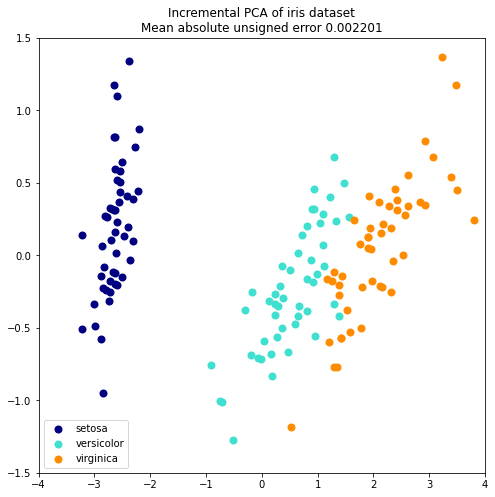

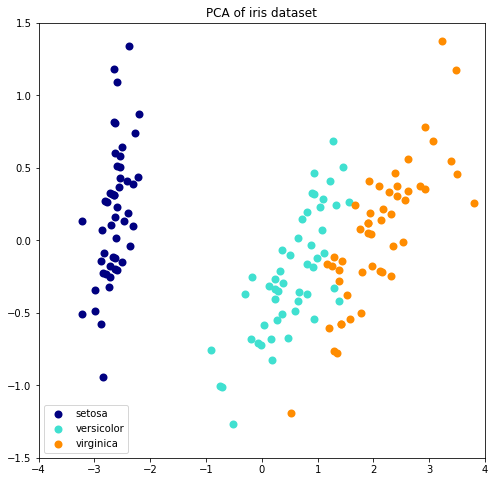

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X, y = datasets.load_iris(return_X_y=True)

# 要壓縮到幾維的資料
n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ["navy", "turquoise", "darkorange"]

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], ['setosa', 'versicolor', 'virginica']):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,
            lw=2,
            label=target_name,
        )

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()



上面就是把燕尾花資料集投影到2維的資料的樣子，
降維也常被拿來做資料的前處理，
下面是使用例子。



In [24]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, SVR



X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87) 

model_linear = LinearRegression(fit_intercept=True).fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

print("linear Model Explained Variance Score: %.2f" % explained_variance_score(y_test, y_pred))

regression_decision_tree = DecisionTreeRegressor(criterion='squared_error', 
                                                  min_samples_split=20).fit(X_train, y_train)

y_pred = regression_decision_tree.predict(X_test)


model_linearSVR = LinearSVR(C=1, random_state=87, tol=1e-5).fit(X_train, y_train)
y_pred = model_linearSVR.predict(X_test)
print("linear SVR Model Explained Variance Score: %.2f" % explained_variance_score(y_test, y_pred))

model_SVR = SVR(kernel='rbf', C=1, tol=1e-5).fit(X_train, y_train)
y_pred = model_SVR.predict(X_test)
print("SVR Model Explained Variance Score: %.2f" % explained_variance_score(y_test, y_pred))


regression_decision_tree = DecisionTreeRegressor(criterion='squared_error', 
                                                  min_samples_split=20).fit(X_train, y_train)

y_pred = regression_decision_tree.predict(X_test)
print("Decision Tree Test Explained Variance Score: %.2f" % explained_variance_score(y_test, y_pred))

regression_random_forest = RandomForestRegressor(criterion='squared_error', 
                                                min_samples_split=20).fit(X_train, y_train)

y_pred = regression_random_forest.predict(X_test)

print("Random Forest Test Explained Variance Score: %.2f" % explained_variance_score(y_test, y_pred))

regression_extra_tree = ExtraTreesRegressor(criterion='squared_error',  
                                            min_samples_split=20).fit(X_train, y_train)
y_pred = regression_extra_tree.predict(X_test)

print("ExtraTrees Test Explained Variance Score: %.2f" % explained_variance_score(y_test, y_pred))

for i in range(9, 0, -1):
    print("\t PCA with %s components." % i)
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=87) 

    model_linear = LinearRegression(fit_intercept=True).fit(X_train, y_train)
    y_pred = model_linear.predict(X_test)
    print("linear Model Explained Variance Score: %.2f" % explained_variance_score(y_test, y_pred))

    model_linearSVR = LinearSVR(C=1, random_state=87, tol=1e-5).fit(X_train, y_train)
    y_pred = model_linearSVR.predict(X_test)
    print("linear SVR Model Explained Variance Score: %.2f" % explained_variance_score(y_test, y_pred))

    model_SVR = SVR(kernel='rbf', C=1, tol=1e-5).fit(X_train, y_train)
    y_pred = model_SVR.predict(X_test)
    print("SVR Model Explained Variance Score: %.2f" % explained_variance_score(y_test, y_pred))

    regression_random_forest = RandomForestRegressor(criterion='squared_error', 
                                                min_samples_split=20).fit(X_train, y_train)

    y_pred = regression_random_forest.predict(X_test)

    print("Random Forest Test Explained Variance Score: %.2f" % explained_variance_score(y_test, y_pred))

    regression_extra_tree = ExtraTreesRegressor(criterion='squared_error',  
                                            min_samples_split=20).fit(X_train, y_train)
    y_pred = regression_extra_tree.predict(X_test)

    print("ExtraTrees Test Explained Variance Score: %.2f" % explained_variance_score(y_test, y_pred))



linear Model Explained Variance Score: 0.52
linear SVR Model Explained Variance Score: 0.02
SVR Model Explained Variance Score: 0.20
Decision Tree Test Explained Variance Score: -0.02
Random Forest Test Explained Variance Score: 0.44
ExtraTrees Test Explained Variance Score: 0.47
	 PCA with 9 components.
linear Model Explained Variance Score: 0.52
linear SVR Model Explained Variance Score: 0.02
SVR Model Explained Variance Score: 0.20
Random Forest Test Explained Variance Score: 0.48
ExtraTrees Test Explained Variance Score: 0.50
	 PCA with 8 components.
linear Model Explained Variance Score: 0.52
linear SVR Model Explained Variance Score: 0.02
SVR Model Explained Variance Score: 0.20
Random Forest Test Explained Variance Score: 0.51
ExtraTrees Test Explained Variance Score: 0.49
	 PCA with 7 components.
linear Model Explained Variance Score: 0.53
linear SVR Model Explained Variance Score: 0.02
SVR Model Explained Variance Score: 0.21
Random Forest Test Explained Variance Score: 0.51
E